## Combining dataframes for multiple plates
Here I combine multiple dataframes to one "master" dataframe holding all the data.
Since the filenames contain useful metadata in a systematic form, we can get these
parameters and add them as columns to each individual plate dataframe.
Then we can use these parameters to configure the Seaborn plotting, making it easy to compare
the different plates.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import os

from functions import *

In [33]:
# Define the datafiles and their corresponding plate template in a dictionary
DATASETS = {
    'Pseudomonas_Sp_mr4-99_Round1_.csv': 'Template_pseudomonas.csv',
    'Halomonas_Sp_r5-57_Round1_.csv': 'Template_halomonas.csv'
}

In [34]:
# This cell takes about 40 seconds on my computer to complete
combined = pd.DataFrame()
for dataset, template in DATASETS.items():
    param1, param2, param3, param4, extension = dataset.split('_')
    
    df = pd.read_csv(os.path.join('Datasets', dataset), delimiter=';')
    temp = pd.read_csv(os.path.join('Templates', template), index_col=0).values.tolist()
    
    long = toLongForm(df, temp)
    comb = combineReplicates(long)
    comb['Param1'] = param1
    comb['Param2'] = param2
    comb['Param3'] = param3
    comb['Param4'] = param4
    
    combined = pd.concat([combined, comb], axis=0)

/Users/abr121/Documents/dev/Mikkel/venv/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: invalid value encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


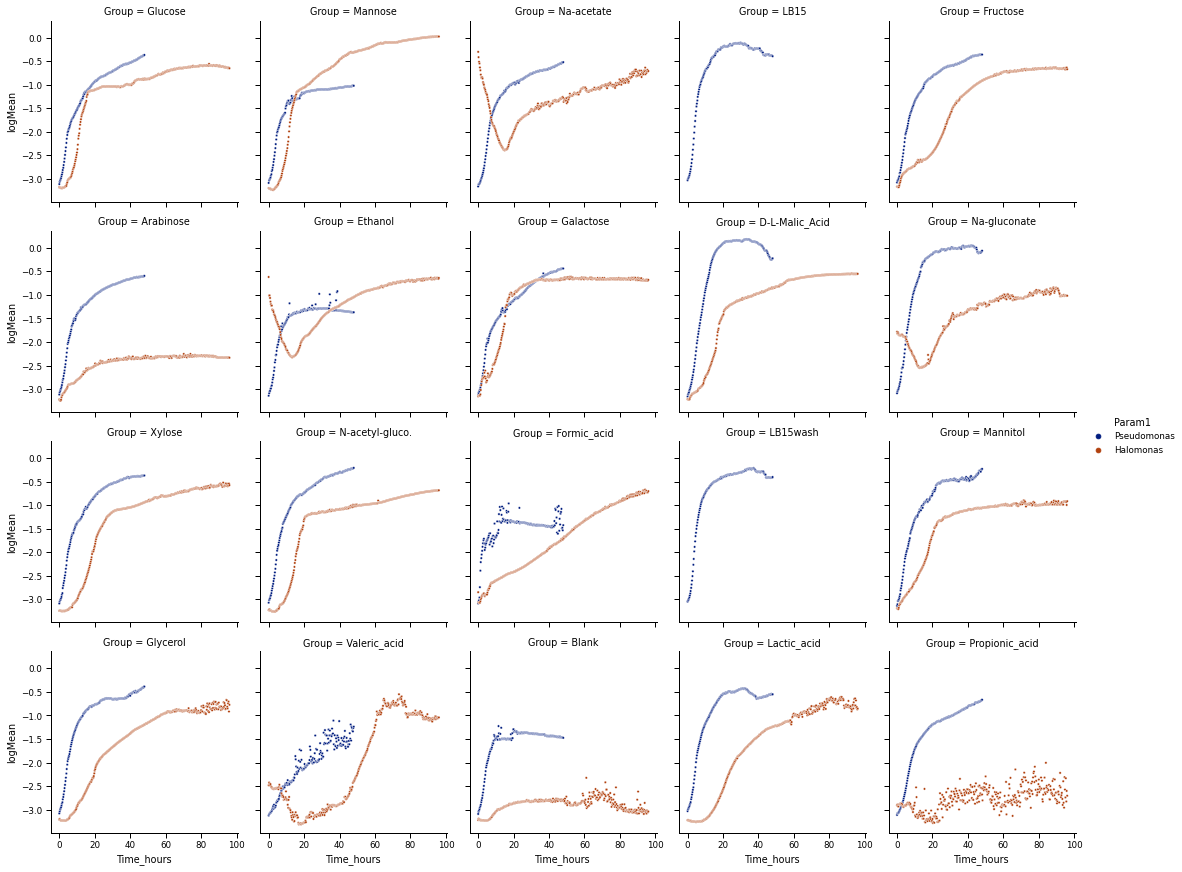

In [36]:
# Compare growth curves for Halomonas and Pseudomonas, using the metadata parameters we added above
sns.relplot(data=combined,
            x='Time_hours',
            y='logMean',
            hue='Param1',
            kind='scatter',
            col='Group', col_wrap=5,
            marker='.',
            height=3,
            palette='dark')